In [19]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

# helper functions
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Camera Calibration

In [6]:
import os
calibration_images = os.listdir("camera_cal")
calibration_images

['calibration14.jpg',
 'calibration8.jpg',
 'calibration16.jpg',
 'calibration1.jpg',
 'calibration19.jpg',
 'calibration12.jpg',
 'calibration15.jpg',
 'calibration11.jpg',
 'calibration2.jpg',
 'calibration10.jpg',
 'calibration17.jpg',
 'calibration4.jpg',
 'calibration13.jpg',
 'calibration9.jpg',
 'calibration7.jpg',
 'calibration3.jpg',
 'calibration18.jpg',
 'calibration20.jpg',
 'calibration5.jpg',
 'calibration6.jpg']

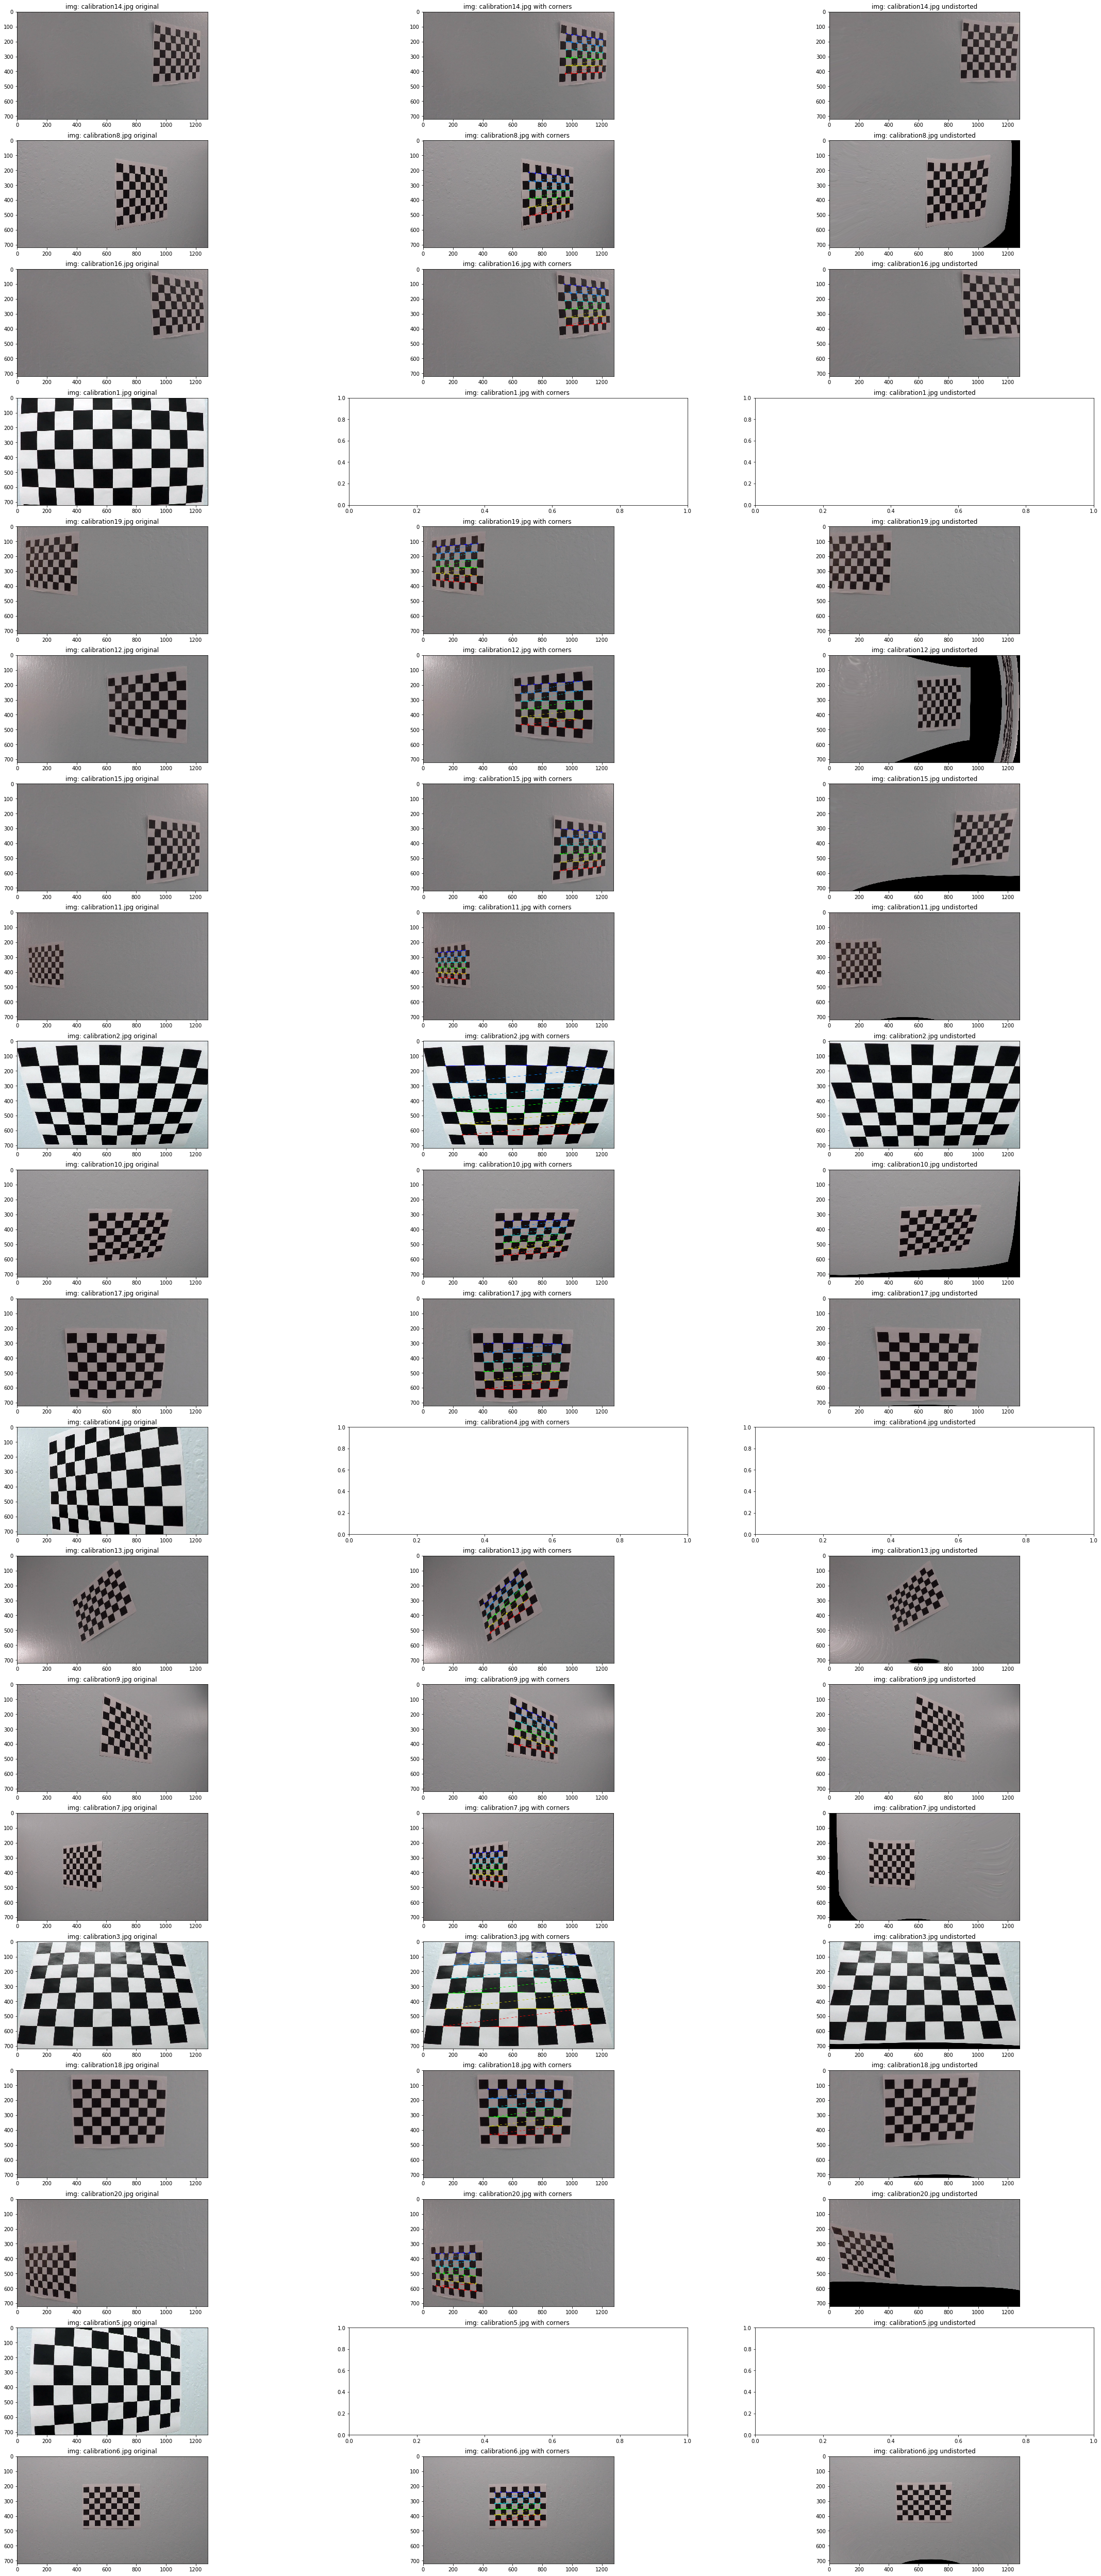

In [53]:
# 9 * 6 chessboard images
nx = 9
ny = 6

def plot_calibration_results(images):
    fig = plt.figure(figsize = (40, 50))
    image_plots = []
    for index, image in enumerate(images):
        image_plots.append(fig.add_subplot(20, 3, index * 3 + 1))
        image_plots[-1].set_title("img: " + image[3] + " original")
        plt.imshow(image[0])
        
        image_plots.append(fig.add_subplot(20, 3, index * 3 + 2))
        image_plots[-1].set_title("img: " + image[3] +" with corners ")
        if image[1] is not None:
            plt.imshow(image[1], cmap="gray")
        
        image_plots.append(fig.add_subplot(20, 3, index * 3 + 3))
        image_plots[-1].set_title("img: " + image[3] +" undistorted")
        if image[2] is not None:
            plt.imshow(image[2], cmap="gray")
    plt.subplots_adjust(top=1.5)
    plt.savefig("output_images/calibration_results.png")
    plt.show()

def calibrate_camera(img):
    results = []
    objpoints = []
    imgpoints = [] 
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:, :2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    for index, image_name in enumerate(calibration_images):
        img_with_corners = None
        img = cv2.imread('camera_cal/' + image_name)
        gray = grayscale(img)
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
        if ret:
            img_with_corners = np.copy(img)
            img_with_corners = cv2.drawChessboardCorners(img_with_corners, (nx,ny), corners, ret)
            objpoints.append(objp)
            corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        
            imgpoints.append(corners)
        results[index] = [img, img_with_corners]

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump( dist_pickle, open( "calibration.p", "wb" ) )
    for index, images in enumerate(results):
        undistorted = cv2.undistort(images[0], mtx, dist, None, mtx)
        images[2] = undistorted


plot_calibration_results(results)



### Image Pipeline

### Pipeline (Video)